In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
import copy

In [ ]:
data = pd.read_excel('station_locations.xlsx')

In [ ]:
data.head()

,Station Name,Latitude,Longitude
0,Alipur,28.815329,77.153010
1,Anand_Vihar,28.646835,77.316032
2,Ashok_Vihar,28.695381,77.181665
3,Bawana,28.776200,77.051074
4,DTU,28.750050,77.111261


In [ ]:
pm_data = pd.read_excel('pm.xlsx')

In [ ]:
pm_data.head()
pm_data = pd.DataFrame(pm_data)
pm_data

,FromDate,ToDate,Alipur,Anand_Vihar,Ashok_Vihar,Bawana,DTU,Dr_Karni_Singh_Shooting_Range,Dwarka_Sector_8,IHBAS,Jahangirpuri,Jawaharlal_Nehru_Stadium,Major_Dhyan_Chand_National_Stadium,Mandir_Marg,Mundka,NSIT_Dwarka,Najafgarh,Narela,Nehru_Nagar,Okhla_Phase_2,Patparganj,Punjabi_Bagh,Pusa_Delhi_DPCC,RK_Puram,Rohini,Shadipur,Sirifort,Sonia_Vihar,Sri_Aurobindo_Marg,Vivek_Vihar,Wazirpur
0,01-Jan-2019 - 00:00,01-Jan-2019 - 01:00,361.5,517.25,408.25,128.0,349.00,360.00,486.00,330.65,414.25,608.50,350.50,386.25,474.5,504.96,186.25,271.75,689.50,504.25,458.25,501.25,420.25,655.50,406.00,291.55,432.75,415.00,252.50,347.50,467.0
1,01-Jan-2019 - 01:00,01-Jan-2019 - 02:00,348.0,531.25,466.75,138.0,374.75,312.00,401.75,316.53,402.00,677.00,366.75,383.50,397.0,465.76,197.50,250.50,596.00,504.75,472.25,521.25,475.75,583.50,401.00,371.05,401.75,533.00,289.50,307.00,483.0
2,01-Jan-2019 - 02:00,01-Jan-2019 - 03:00,298.0,542.00,496.00,123.0,383.00,291.00,333.75,297.23,361.75,655.00,352.75,467.50,308.0,410.38,192.50,237.00,524.50,482.25,440.50,538.50,515.75,435.75,376.00,468.18,398.75,431.00,292.50,288.50,473.5
3,01-Jan-2019 - 03:00,01-Jan-2019 - 04:00,276.5,547.50,467.25,125.0,337.75,287.00,256.75,279.30,329.75,550.50,326.00,474.75,318.5,320.13,188.75,249.25,462.25,426.25,437.25,465.25,487.25,351.50,340.00,458.30,364.75,414.00,283.50,294.00,496.0
4,01-Jan-2019 - 04:00,01-Jan-2019 - 05:00,295.0,497.00,453.25,130.0,387.00,289.00,222.25,258.45,346.00,441.00,271.00,435.00,304.5,273.90,182.25,261.00,370.50,365.50,396.00,361.00,454.50,319.75,371.00,417.15,327.75,381.00,264.50,334.00,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8744,31-Dec-2019 - 08:00,31-Dec-2019 - 09:00,221.0,194.50,212.00,200.0,190.38,191.25,180.25,152.62,218.50,217.75,197.00,177.75,214.0,135.73,166.00,177.50,221.00,243.50,199.25,162.75,193.50,133.00,212.25,167.82,199.50,178.75,181.50,195.75,263.0
8745,31-Dec-2019 - 09:00,31-Dec-2019 - 10:00,246.5,196.50,235.00,234.0,200.19,214.50,196.50,160.65,218.75,250.25,226.75,202.25,224.0,133.45,181.00,204.75,250.75,261.00,211.00,177.25,231.50,159.25,225.75,171.17,245.25,223.50,207.50,209.00,288.5
8746,31-Dec-2019 - 10:00,31-Dec-2019 - 11:00,289.0,190.75,244.50,257.0,233.52,221.50,222.25,143.65,256.50,243.50,215.75,206.00,266.0,144.02,194.50,252.00,236.75,244.50,199.00,208.50,255.75,166.50,255.00,206.02,283.25,260.00,222.25,209.25,286.0
8747,31-Dec-2019 - 11:00,31-Dec-2019 - 12:00,301.0,196.75,244.00,289.0,264.55,201.25,243.75,180.57,281.50,220.25,215.50,209.75,296.5,167.12,207.00,317.00,222.75,217.50,210.00,216.25,239.50,167.75,255.00,189.32,266.50,253.00,228.25,222.75,273.0


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
pm_data_scaled = min_max_scaler.fit_transform(pm_data.drop(labels=['FromDate','ToDate'],axis=1))
pm_data_normalized = pd.DataFrame(pm_data_scaled)

<Figure size 432x288 with 0 Axes>

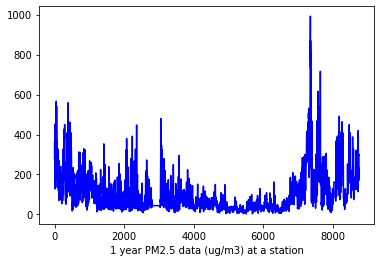

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.xlabel("1 year PM2.5 data (ug/m3) at a station")
plt.plot(pm_data['Alipur'], 'b')
plt.figure()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
pm_data_scaled = min_max_scaler.fit_transform(pm_data.drop(labels=['FromDate','ToDate'],axis=1))
pm_data_normalized = pd.DataFrame(pm_data_scaled)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
pm_data_scaled = min_max_scaler.fit_transform(pm_data.drop(labels=['FromDate','ToDate'],axis=1))
pm_data_normalized = pd.DataFrame(pm_data_scaled)

In [ ]:
pm_data_normalized.shape

(8749, 29)

In [ ]:
index_val = []
for i in range(pm_data_normalized.shape[1]):
  index1 = []
  for j in range(pm_data_normalized.shape[1]):
    if i != j:
      a = ((data['Latitude'][i]-data['Latitude'][j])**2)
      b = ((data['Longitude'][i]-data['Longitude'][j])**2)
      ans = (a+b)**0.5
      index1.append(ans)
  i1=0
  val = [i]
  index2 = copy.copy(index1)
  while(i1<3):
    val.append(index1.index(max(index2)))
    index2.remove(max(index2))
    i1 += 1
  index_val.append(val)
print(index_val)

[[0, 4, 13, 16], [1, 13, 2, 12], [2, 13, 4, 16], [3, 4, 16, 1], [4, 4, 16, 13], [5, 14, 3, 13], [6, 26, 0, 1], [7, 13, 12, 3], [8, 13, 5, 16], [9, 13, 14, 3], [10, 13, 14, 3], [11, 13, 14, 3], [12, 5, 16, 1], [13, 26, 1, 7], [14, 26, 1, 7], [15, 5, 16, 25], [16, 14, 15, 3], [17, 14, 15, 3], [18, 14, 3, 15], [19, 15, 0, 14], [20, 14, 15, 5], [21, 14, 5, 17], [22, 5, 17, 14], [23, 14, 5, 15], [24, 15, 14, 3], [25, 14, 13, 6], [26, 15, 0, 3], [27, 14, 13, 3], [28, 14, 5, 17]]


In [ ]:
pm_data_normalized.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.362809,0.549348,0.420010,0.122967,0.360474,0.372093,0.545914,0.334132,0.417424,0.700230,0.361922,0.40873,0.483690,0.689431,0.205347,0.304652,0.746818,0.557927,0.466175,0.507338,0.429703,0.748288,0.424686,0.449292,0.44671,0.539136,0.275354,0.363019,0.480829
1,0.349166,0.564246,0.480195,0.133130,0.387070,0.322481,0.451278,0.319863,0.405051,0.779056,0.378714,0.40582,0.404689,0.635911,0.217751,0.280830,0.645546,0.558481,0.480417,0.527581,0.486452,0.666096,0.419456,0.534610,0.41471,0.692433,0.315703,0.320710,0.497409


In [ ]:
train_size = int(len(pm_data_normalized) * 0.9)
print(train_size)
train, test = pm_data_normalized.iloc[0:train_size], pm_data_normalized.iloc[train_size:len(pm_data_normalized)]
print(len(train), len(test))

7874
7874 875


In [ ]:
len(pm_data_normalized)

8749

In [ ]:
train_data = []
test_data = []
for i in range(train.shape[1]):
  train_data.append(list(train[i].to_numpy()))
  test_data.append(list(test[i].to_numpy()))

In [ ]:
train_x = []
train_y = []

In [ ]:
window=24
for i in range(len(train_data[0])-window):
  train_tempX = []
  train_tempY = []
  for j in range(train.shape[1]):
    train_tempx = []
    train_tempy = []
    for k in range(len(index_val[0])):
      train_tempx.append(train_data[index_val[j][k]][i:i+window-1])
    train_tempX.append(train_tempx)
    train_tempY.append(train_data[j][i+window])
  train_x.append(train_tempX)
  train_y.append(train_tempY)

In [ ]:
train_X = np.array(train_x)
train_Y = np.array(train_y)

In [ ]:
print(train_X.shape)
print(train_Y.shape)

(7850, 29, 4, 23)
(7850, 29)


In [ ]:
test_x = []
test_y = []
window=24
for i in range(len(test_data[0])-window):
  test_tempX = []
  test_tempY = []
  for j in range(test.shape[1]):
    test_tempx = []
    test_tempy = []
    for k in range(len(index_val[0])):
      test_tempx.append(test_data[index_val[j][k]][i:i+window-1])
    test_tempX.append(test_tempx)
    test_tempY.append(test_data[j][i+window])
  test_x.append(test_tempX)
  test_y.append(test_tempY)

In [ ]:
test_X = np.array(test_x)
test_Y = np.array(test_y)

In [ ]:
print(test_X.shape)
print(test_Y.shape)

(851, 29, 4, 23)
(851, 29)


In [ ]:
train_x1 = []
train_y1 = []
window=24
for i in range(len(train_data[0])-window):
  train_tempX = []
  train_tempY = []
  for j in range(train.shape[1]):
    train_tempX.append(train_data[j][i:i+window-1])
    train_tempY.append(train_data[j][i+window])
  train_x1.append(train_tempX)
  train_y1.append(train_tempY)
train_X_2d = np.array(train_x1)
train_Y_2d = np.array(train_y1)
print(train_X_2d.shape)
print(train_Y_2d.shape)

(7850, 29, 23)
(7850, 29)


In [ ]:
test_x1 = []
test_y1 = []
window=24
for i in range(len(test_data[0])-window):
  test_tempX = []
  test_tempY = []
  for j in range(test.shape[1]):
    test_tempX.append(test_data[j][i:i+window-1])
    test_tempY.append(test_data[j][i+window])
  test_x1.append(test_tempX)
  test_y1.append(test_tempY)
test_X_2d = np.array(test_x1)
test_Y_2d = np.array(test_y1)
print(test_X_2d.shape)
print(test_Y_2d.shape)

(851, 29, 23)
(851, 29)


In [ ]:
rh_data = pd.read_excel('RH.xlsx')

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
rh_data_scaled = min_max_scaler.fit_transform(rh_data.drop(labels=['FromDate','ToDate'],axis=1))
rh_data_normalized = pd.DataFrame(rh_data_scaled)

In [ ]:
train_size = int(len(rh_data_normalized[0]) * 0.9)
rh_train = []
rh_test = []
for i in range(train_size-24):
  rh_train1 = rh_data_normalized.iloc[i:i+23]
  rh_train1 = rh_train1.sum()/23
  rh_train.append(rh_train1)

for i in range(train_size,len(rh_data_normalized)-24):
  rh_test1 =  rh_data_normalized.iloc[i:i+23]
  rh_test1 = rh_test1.sum()/23
  rh_test.append(rh_test1)

rh_train = np.array(rh_train)
rh_test = np.array(rh_test)

print(rh_train.shape, rh_test.shape)

(7850, 29) (851, 29)


In [ ]:
ws_data = pd.read_excel('ws.xlsx')

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
ws_data_scaled = min_max_scaler.fit_transform(ws_data.drop(labels=['FromDate','ToDate'],axis=1))
ws_data_normalized = pd.DataFrame(ws_data_scaled)

In [ ]:
train_size = int(len(ws_data_normalized[0]) * 0.9)
ws_train = []
ws_test = []
for i in range(train_size-24):
  ws_train1 = ws_data_normalized.iloc[i:i+23]
  ws_train1 = ws_train1.sum()/23
  ws_train.append(ws_train1)

for i in range(train_size,len(ws_data_normalized)-24):
  ws_test1 =  ws_data_normalized.iloc[i:i+23]
  ws_test1 = ws_test1.sum()/23
  ws_test.append(ws_test1)

ws_train = np.array(ws_train)
ws_test = np.array(ws_test)

print(ws_train.shape, ws_test.shape)

(7850, 29) (851, 29)


<Figure size 432x288 with 0 Axes>

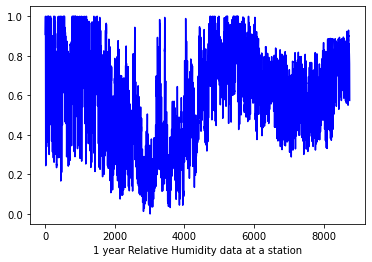

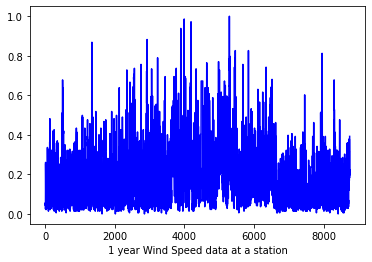

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.xlabel("1 year Relative Humidity data at a station")
plt.plot(rh_data_normalized[2], 'b')
plt.figure()
print()
plt.xlabel("1 year Wind Speed data at a station")
plt.plot(ws_data_normalized[2], 'b')
plt.figure()

<Figure size 432x288 with 0 Axes>

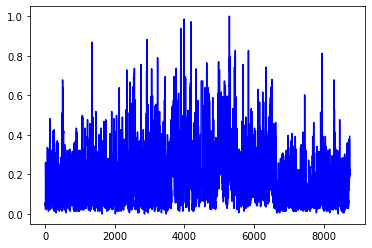

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(ws_data_normalized[2], 'b')
plt.figure()

<Figure size 432x288 with 0 Axes>

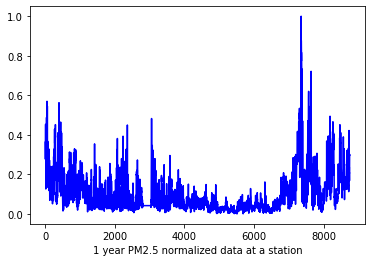

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.xlabel("1 year PM2.5 normalized data at a station")
plt.plot(pm_data_normalized[0], 'b')
plt.figure()

<Figure size 432x288 with 0 Axes>

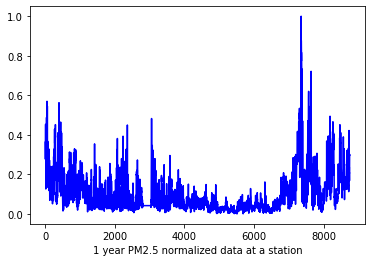

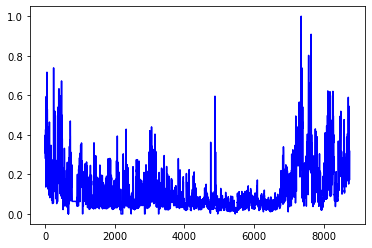

<Figure size 432x288 with 0 Axes>

In [ ]:
#[0, 4, 13, 16]
plt.xlabel("1 year PM2.5 normalized data at a station")
plt.plot(pm_data_normalized[0], 'b')
plt.figure()
plt.plot(pm_data_normalized[4], 'b')
plt.figure()
#plt.plot(pm_data_normalized[13], 'b')
#plt.figure()
#plt.plot(pm_data_normalized[16], 'b')
#plt.figure()